In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import seaborn

In [6]:
df = pd.read_csv('data/Nursing Home Data/Nursing Home Data_data', sep='\s+')

In [10]:
df.head()

,BED,MCDAYS,TDAYS,PCREV,NSAL,FEXP,RURAL
0,244,128,385,23521,5230,5334,0
1,59,155,203,9160,2459,493,1
2,120,281,392,21900,6304,6115,0
3,120,291,419,22354,6590,6346,0
4,120,238,363,17421,5362,6225,0


In [8]:
df_rural = df[df['RURAL']==1]
df_urban = df[df['RURAL']==0]

In [11]:
df_rural.head()

,BED,MCDAYS,TDAYS,PCREV,NSAL,FEXP,RURAL
1,59,155,203,9160,2459,493,1
5,65,180,234,10531,3622,449,1
6,120,306,372,22147,4406,4998,1
7,90,214,305,14025,4173,966,1
9,120,133,188,11729,3224,6442,1


In [12]:
df_urban.head()

,BED,MCDAYS,TDAYS,PCREV,NSAL,FEXP,RURAL
0,244,128,385,23521,5230,5334,0
2,120,281,392,21900,6304,6115,0
3,120,291,419,22354,6590,6346,0
4,120,238,363,17421,5362,6225,0
8,96,155,169,8812,1955,1260,0


### Visualisation

In [28]:

def two_histograms(x, y):
    x.hist(alpha=0.5, weights=[1./len(x)]*len(x), label='urban')
    y.hist(alpha=0.5, weights=[1./len(y)]*len(y), label='rural')
    plt.axvline(x.mean(), color='blue', alpha=0.8, linestyle='dashed')
    plt.axvline(y.mean(), color='orange', alpha=0.8, linestyle='dashed')
    plt.legend(['urban', 'rural', 'Urban', 'Rural'])

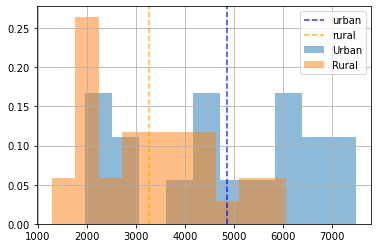

In [29]:
two_histograms(df_urban['NSAL'], df_rural['NSAL'])

Не вооруженным глазом выдно, что распределения не нормальны

In [37]:
res = mannwhitneyu(df_urban['NSAL'], df_rural['NSAL'])
print('p-value:', res[1])

p-value: 0.0008872799867406389


Медианы не равны, так как p-value < 0.05

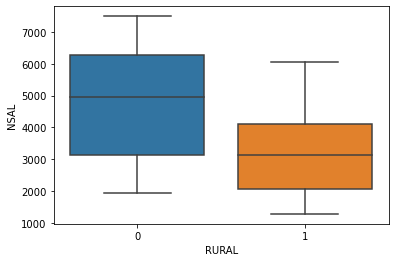

In [41]:
seaborn.boxplot(x='RURAL', y='NSAL', data=df)

Еще раз убедились, что средние отличаются